In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart - heart.csv to heart - heart.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    auc,
    classification_report
)

In [6]:
df = pd.read_csv("heart - heart.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
X = df.drop(columns=['output'])
y = df['output']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [9]:
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [10]:
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

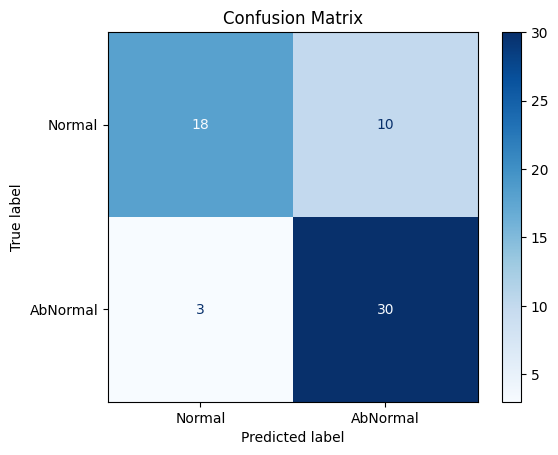

In [11]:
classes = ["Normal", "AbNormal"]
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Precision:", precision_score(y_test, y_pred) * 100)
print("Recall:", recall_score(y_test, y_pred) * 100)
print("F1 Score:", f1_score(y_test, y_pred) * 100)

Accuracy: 78.68852459016394
Precision: 75.0
Recall: 90.9090909090909
F1 Score: 82.1917808219178


ROC AUC Score: 0.8176406926406926


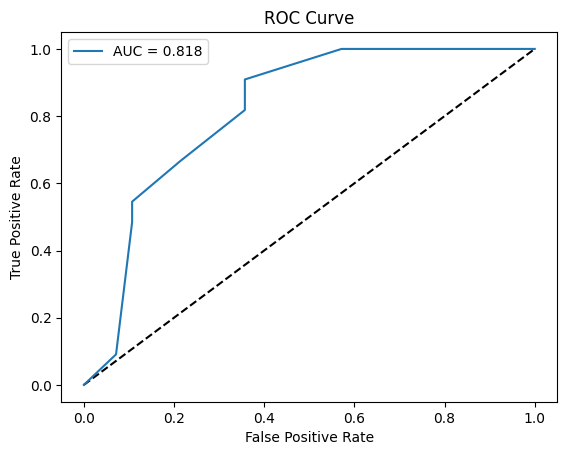

In [13]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [14]:
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

      Normal       0.86      0.64      0.73        28
    AbNormal       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61

